# Linear Regression Machine Learning Project for House Price Prediction

### Import Libraries

In [1]:
#objective of our program is to predict the house price
#import all lib-----
#load the data-----
#data analysis------
#Data preprocessing---------
#split data into train test split (train,test)#
#selet algorithm
#train your model
#test your model
#check accuracy (80%)
#prediction/classification

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import mysql.connector

%matplotlib inline

In [12]:
#Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.

#NumPy is an open-source numerical Python library. NumPy contains a multi-dimensional array and matrix data structures

#pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming lang

# connecting with Mysql using xammp

In [13]:
my_db=mysql.connector.connect(host="localhost",user="root",password="",database="house_data")
print('you are connected to database now',my_db)
mycursor=my_db.cursor()
S=(" SELECT * from house_data_baldau")
mycursor.execute(S)

InterfaceError: 2003: Can't connect to MySQL server on 'localhost:3306' (10061 No connection could be made because the target machine actively refused it)

In [14]:
result=mycursor.fetchall()
for rec in result:
    print(rec)
   

NameError: name 'mycursor' is not defined

### Importing Data and Checking out.

In [9]:
HouseDF = pd.DataFrame(result,columns=['location','size','society','total_sqft','bath','balcony','price'])

NameError: name 'result' is not defined

In [10]:
HouseDF.head()

NameError: name 'HouseDF' is not defined

#Avg Area income means avg salary of that city peole,similarly all the columns

# removing Location and society from the table ,since they are not helpful

In [9]:
HouseDF.drop('location',axis=1,inplace=True)
HouseDF.drop('society',axis=1,inplace=True)
HouseDF.drop([0],axis=0,inplace=True)

In [10]:
HouseDF.head()

,size,total_sqft,bath,balcony,price
1,2,1056,2,1,39.07
2,4,2600,5,3,120
3,3,1440,2,3,62
4,3,1521,3,1,95
5,2,1200,2,1,51


In [11]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 1 to 5057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   size        5057 non-null   object
 1   total_sqft  5057 non-null   object
 2   bath        5057 non-null   object
 3   balcony     5057 non-null   object
 4   price       5057 non-null   object
dtypes: object(5)
memory usage: 237.0+ KB


In [12]:
HouseDF=HouseDF.astype(float)

In [21]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 1 to 5057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        5057 non-null   float64
 1   total_sqft  5057 non-null   float64
 2   bath        5057 non-null   float64
 3   balcony     5057 non-null   float64
 4   price       5057 non-null   float64
dtypes: float64(5)
memory usage: 237.0 KB


In [13]:
HouseDF.describe()

,size,total_sqft,bath,balcony,price
count,5057.000000,5057.000000,5057.000000,5057.000000,5057.000000
mean,3.194186,1385.844588,3.118647,1.538857,144.884281
std,1.610470,845.700989,1.679691,0.729766,146.076390
min,1.000000,5.000000,1.000000,0.000000,10.000000
25%,2.000000,1020.000000,2.000000,1.000000,50.600000
50%,3.000000,1196.000000,2.000000,1.000000,77.250000
75%,3.000000,1525.000000,4.000000,2.000000,198.000000
max,27.000000,35000.000000,27.000000,3.000000,2700.000000


In [14]:
HouseDF.columns

Index(['size', 'total_sqft', 'bath', 'balcony', 'price'], dtype='object')

## Exploratory Data Analysis for House Price Prediction

In [ ]:
sns.pairplot(HouseDF)

In [ ]:
sns.distplot(HouseDF['Price'])

In [ ]:
sns.heatmap(HouseDF.corr(), annot=True)

## Training a Linear Regression Model

### X and y List

In [6]:
X = HouseDF[['size', 'total_sqft', 'bath', 'balcony']]

y = HouseDF['price']

NameError: name 'HouseDF' is not defined

# in the above cell X is independent and y is dependent variable eg:price

### Split Data into Train, Test

In [16]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Creating and Training the LinearRegression Model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.score(X_test,y_test)

0.7065672948164599

Accuracy of predicted value is 91% which is considered as good prediction.

## Predictions from our Linear Regression Model

In [42]:
X_test

,size,total_sqft,bath,balcony
3888,4.0,2483.0,5.0,2.0
481,6.0,1020.0,6.0,1.0
3468,6.0,1020.0,6.0,1.0
167,3.0,1350.0,2.0,1.0
3839,2.0,1104.0,2.0,2.0
...,...,...,...,...
4228,3.0,1410.0,2.0,2.0
2648,2.0,1043.0,2.0,2.0
4462,3.0,1880.0,3.0,2.0
3954,3.0,1270.0,2.0,2.0


In [44]:
predictions = lm.predict(X_test)

In [45]:
predictions

array([295.26504281, 324.32773087, 324.32773087, ..., 154.334192  ,
        78.43931041,  55.05973356])

In [46]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5057 entries, 1 to 5057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        5057 non-null   float64
 1   total_sqft  5057 non-null   float64
 2   bath        5057 non-null   float64
 3   balcony     5057 non-null   float64
 4   price       5057 non-null   float64
dtypes: float64(5)
memory usage: 237.0 KB


# Taking input from user depending upon their requirentment

In [2]:
print('WELCOME TO OUR PORTEL\n')
Name=input("Plz let us Know your Name: ")
size=int(input('Enter size in BHK '))
total_sq=float(input('Enter Area House in squarfoot '))
bath=float(input('Enter NO.of bathroom '))
balcony=int(input('Enter No. of balcony '))
print("Thank you ")

WELCOME TO OUR PORTEL

Plz let us Know your Name: baldfsu
Enter size in BHK 2
Enter Area House in squarfoot 1000
Enter NO.of bathroom 2
Enter No. of balcony 3
Thank you 


In [3]:
data=np.array([[size,total_sq,bath,balcony]])
data


array([[   2., 1000.,    2.,    3.]])

In [4]:
price=lm.predict(data)
price=float(price)
print('House price is ',price, 'lakhs')

NameError: name 'lm' is not defined

In [5]:
data=(Name,size,total_sq,bath,balcony,price)
i="Insert into Userdata1(Name,size,total_sq,bath,balcony,price) values(%s,%s,%s,%s,%s,%s)"
mycursor.execute(i,data)
my_db.commit()

NameError: name 'price' is not defined

## plotting prediction rate on the scatter plot

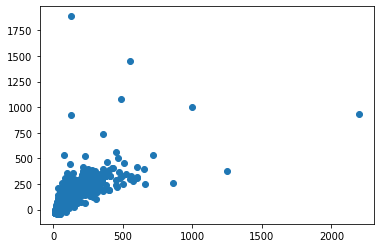

In [59]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

# Checking Accuracy

In [60]:
lm.score(X_test,y_test)

0.7065672948164599

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.